<a href="https://colab.research.google.com/github/D1N3SH-DEV/SC_Analysis_AML/blob/main/SC_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

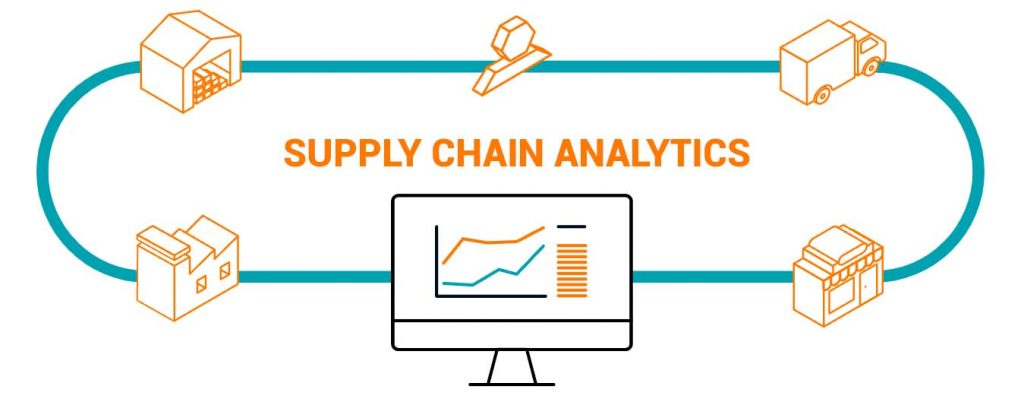

In [45]:
from IPython.display import display, Image
display(Image(filename='/content/drive/My Drive/DatasetCapstone/sca.jpg'))

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [4]:
data = pd.read_csv("/content/drive/My Drive/DatasetCapstone/supply_chain_data.csv")
data.head(5)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

<Axes: >

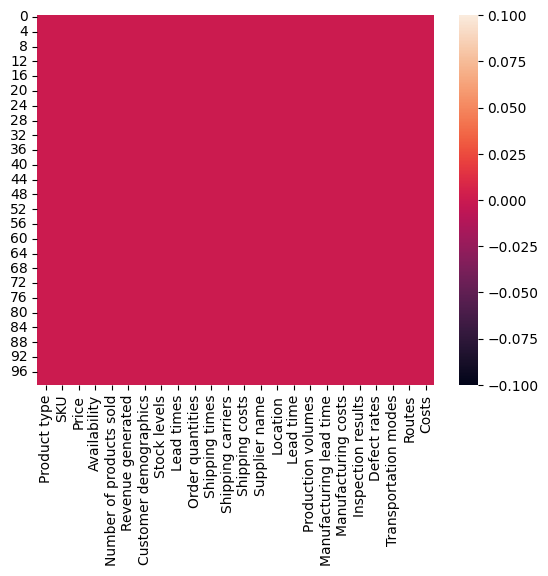

In [6]:
import seaborn as sns
sns.heatmap(data.isnull())

##  Summarizing Key Insights

In [8]:
# Total revenue by product type
revenue_by_product = data.groupby('Product type')['Revenue generated'].sum()
print(revenue_by_product)

Product type
cosmetics    161521.265999
haircare     174455.390605
skincare     241628.162133
Name: Revenue generated, dtype: float64


In [9]:
# Average price per SKU
average_price_by_sku = data.groupby('SKU')['Price'].mean()
print(average_price_by_sku)

SKU
SKU0     69.808006
SKU1     14.843523
SKU10    15.707796
SKU11    90.635460
SKU12    71.213389
           ...    
SKU95    77.903927
SKU96    24.423131
SKU97     3.526111
SKU98    19.754605
SKU99    68.517833
Name: Price, Length: 100, dtype: float64


In [10]:
# Total products sold per product type
products_sold_by_type = data.groupby('Product type')['Number of products sold'].sum()
print(products_sold_by_type)

Product type
cosmetics    11757
haircare     13611
skincare     20731
Name: Number of products sold, dtype: int64


## Filtering Data

In [11]:
# Filter products with availability > 50
available_products = data[data['Availability'] > 50]
print(available_products)

   Product type    SKU      Price  Availability  Number of products sold  \
0      haircare   SKU0  69.808006            55                      802   
1      skincare   SKU1  14.843523            95                      736   
3      skincare   SKU3  61.163343            68                       83   
5      haircare   SKU5   1.699976            87                      147   
7     cosmetics   SKU7  42.958384            59                      426   
8     cosmetics   SKU8  68.717597            78                      150   
11     skincare  SKU11  90.635460            95                      960   
15     skincare  SKU15  36.989245            94                      469   
16     skincare  SKU16   7.547172            74                      280   
17    cosmetics  SKU17  81.462534            82                      126   
19     skincare  SKU19  51.123870           100                      187   
21    cosmetics  SKU21  84.893869            60                      601   
22     hairc

In [12]:
# Filter data for Air transportation
air_shipments = data[data['Transportation modes'] == 'Air']
print(air_shipments)

   Product type    SKU      Price  Availability  Number of products sold  \
2      haircare   SKU2  11.319683            34                        8   
4      skincare   SKU4   4.805496            26                      871   
11     skincare  SKU11  90.635460            95                      960   
14     skincare  SKU14  99.171329            26                      562   
16     skincare  SKU16   7.547172            74                      280   
17    cosmetics  SKU17  81.462534            82                      126   
20     skincare  SKU20  96.341072            22                      320   
21    cosmetics  SKU21  84.893869            60                      601   
24     haircare  SKU24   4.156308            32                      209   
28    cosmetics  SKU28   2.397275            12                      394   
36     skincare  SKU36   9.813003            34                      963   
38    cosmetics  SKU38  52.075931            75                      705   
39     skinc

In [13]:
# Filter data for orders from Mumbai
mumbai_orders = data[data['Location'] == 'Mumbai']
print(mumbai_orders)

   Product type    SKU      Price  Availability  Number of products sold  \
0      haircare   SKU0  69.808006            55                      802   
1      skincare   SKU1  14.843523            95                      736   
2      haircare   SKU2  11.319683            34                        8   
8     cosmetics   SKU8  68.717597            78                      150   
27    cosmetics  SKU27  92.557361            42                      352   
28    cosmetics  SKU28   2.397275            12                      394   
38    cosmetics  SKU38  52.075931            75                      705   
43     haircare  SKU43  11.743272             6                      598   
48     haircare  SKU48  76.035544            28                       29   
52     skincare  SKU52  98.031830             1                      820   
56     skincare  SKU56  20.986386            90                       93   
60     skincare  SKU60  17.028028            16                      380   
62    cosmet

## Calculating Metrics

In [14]:
# Add a column for defect rate percentage
data['Defect rate (%)'] = data['Defect rates'] * 100
print(data[['SKU', 'Defect rates', 'Defect rate (%)']].head())

    SKU  Defect rates  Defect rate (%)
0  SKU0      0.226410        22.641036
1  SKU1      4.854068       485.406803
2  SKU2      4.580593       458.059262
3  SKU3      4.746649       474.664862
4  SKU4      3.145580       314.557952


In [15]:
# Total shipping costs per carrier
shipping_costs_by_carrier = data.groupby('Shipping carriers')['Shipping costs'].sum()
print(shipping_costs_by_carrier)

Shipping carriers
Carrier A    155.537831
Carrier B    236.897620
Carrier C    162.379457
Name: Shipping costs, dtype: float64


In [16]:
# Average lead time per supplier
avg_lead_time_by_supplier = data.groupby('Supplier name')['Lead time'].mean()
print(avg_lead_time_by_supplier)

Supplier name
Supplier 1    14.777778
Supplier 2    18.545455
Supplier 3    20.133333
Supplier 4    15.222222
Supplier 5    18.055556
Name: Lead time, dtype: float64


## Bar Plot for Revenue by Product Type

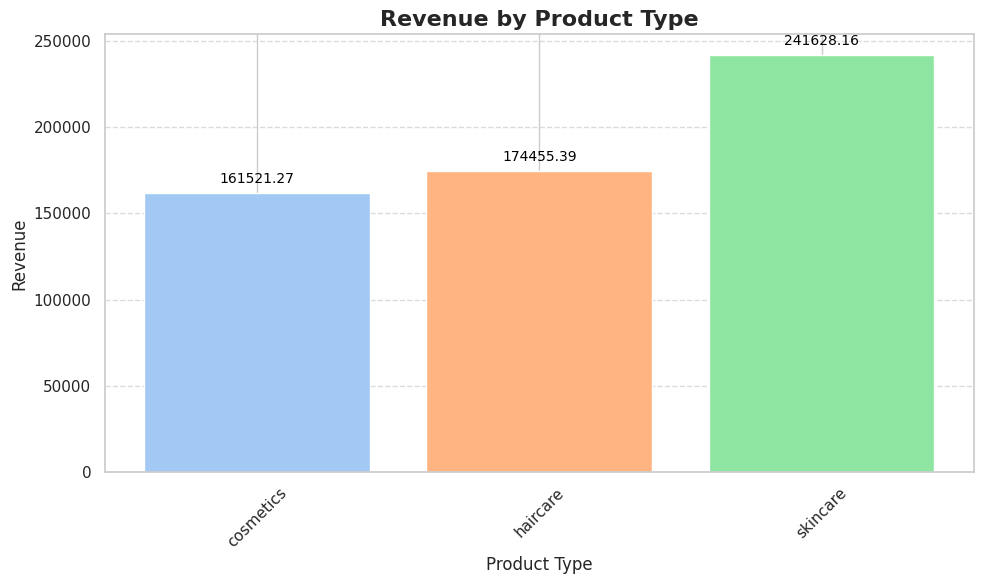

In [24]:
sns.set_theme(style="whitegrid")

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
colors = sns.color_palette("pastel", len(revenue_by_product))  # Use a pastel color palette

# Bar plot with custom colors
bars = ax.bar(revenue_by_product.index, revenue_by_product.values, color=colors)

# Add annotations above the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',  # Format the annotation
                xy=(bar.get_x() + bar.get_width() / 2, height),  # Position at the center of the bar
                xytext=(0, 5),  # Offset the annotation slightly above the bar
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10, color='black')

# Add title and labels
ax.set_title('Revenue by Product Type', fontsize=16, fontweight='bold')
ax.set_xlabel('Product Type', fontsize=12)
ax.set_ylabel('Revenue', fontsize=12)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Add a grid for better readability
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


## Pie Chart for Transportation Modes

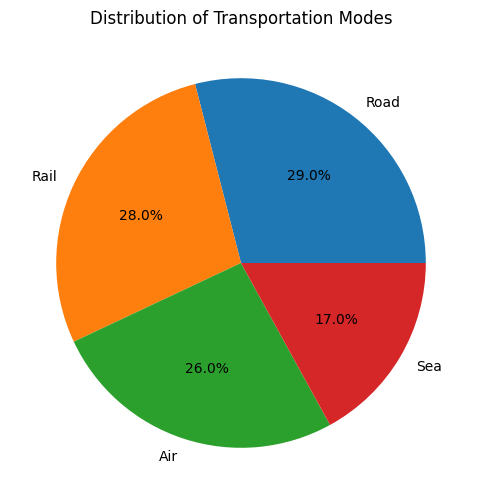

In [19]:
transport_mode_counts = data['Transportation modes'].value_counts()
transport_mode_counts.plot(kind='pie', title='Distribution of Transportation Modes', autopct='%1.1f%%', figsize=(6,6))
plt.ylabel('')
plt.show()

## Correlation Between Price and Defect Rates

In [22]:
correlation = data['Price'].corr(data['Defect rates'])
print(f"Correlation between Price and Defect Rates: {correlation}")

Correlation between Price and Defect Rates: -0.14724668959588122


## Identifying High Revenue Products (e.g., Revenue > 8000)

In [23]:
high_revenue_products = data[data['Revenue generated'] > 8000]
print(high_revenue_products)

   Product type    SKU      Price  Availability  Number of products sold  \
0      haircare   SKU0  69.808006            55                      802   
2      haircare   SKU2  11.319683            34                        8   
7     cosmetics   SKU7  42.958384            59                      426   
14     skincare  SKU14  99.171329            26                      562   
18     haircare  SKU18  36.443628            23                      620   
20     skincare  SKU20  96.341072            22                      320   
23    cosmetics  SKU23   4.324341            30                      391   
24     haircare  SKU24   4.156308            32                      209   
29    cosmetics  SKU29  63.447559             3                      253   
31     skincare  SKU31  50.847393            28                      168   
32     skincare  SKU32  79.209936            43                      781   
34     skincare  SKU34  37.467592            96                      602   
38    cosmet

# Executing Machine Learning Technique

### Importing necessary libraries

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### Defining target column and features

In [31]:
target = 'Revenue generated'
X = data.drop(columns=[target])
y = data[target]

### Identify numerical and categorical columns


In [32]:
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

### Preprocessing for numerical and categorical data

In [34]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

### Create pipeline with Gradient Boosting Regressor

In [35]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

### Split the data into training and test sets

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Fit the model

In [37]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Customer demographics', 'Stock levels',
       'Lead times', 'Order quantities', 'Shipping times', 'Shipping carriers',
       'Shipping costs', 'Supplier name', 'Location', 'Lead time',
       'Production volumes', 'Manufacturing lead time', 'Manufacturing costs',
       'Inspection results', 'Defect rates', 'Transportation modes', 'Routes',
       'Costs', 'Defect rate (%)'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index([], dtype='object'))])),
                ('regressor', GradientBoostingRegressor(random_state=42))])

### Make predictions

In [38]:
y_pred = model.predict(X_test)

### Evaluate the model

In [39]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Squared Error: 1.56
R2 Score: -0.44


### Hyperparameter Tuning with GridSearchCV

In [40]:
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [3, 5, 7],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Customer demographics', 'Stock levels',
       'Lead times', 'Order quantities', 'Shipping times', 'Shipping carriers',
       'Shipping costs', 'Supplier name', 'Location', 'Lead time',
       'Produ...
      dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index([], dtype='object'))])),
                                       ('regressor',
                                        GradientBoostingRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__learning_rate': [0.01, 0.1, 0.2],
                         'regressor__max_depth': [3, 5, 7],
                         'regressor__n_estimators': [100, 200, 300],
                         'regressor__subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=2)

### Best parameters and score

In [41]:
print("Best parameters found:", grid_search.best_params_)
print("Best score found:", -grid_search.best_score_)

Best parameters found: {'regressor__learning_rate': 0.01, 'regressor__max_depth': 3, 'regressor__n_estimators': 100, 'regressor__subsample': 0.8}
Best score found: 1.1061954409811907


### Use the best model for predictions

In [42]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

### Re-evaluate

In [43]:
best_mse = mean_squared_error(y_test, y_pred_best)
best_r2 = r2_score(y_test, y_pred_best)

print(f"Improved Mean Squared Error: {best_mse:.2f}")
print(f"Improved R2 Score: {best_r2:.2f}")

Improved Mean Squared Error: 1.21
Improved R2 Score: -0.12
